In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

path='/content/drive/MyDrive/MLDatasetcollection/student_scores.csv'
data=pd.read_csv(path)
data.head() 


Mounted at /content/drive


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30



$Y_{pred} = \mathbf{W}^T \mathbf{X}+ b$
# Gradient descent
Cost function 
\begin{align*}
\underset{W}{min} J(W) &= \frac{1}{2m}\sum_{i=1}^m (y^i_{pred}-y^i)^2
\end{align*}
\begin{align*}
\frac{\partial }{\partial W_i} J(W) &= \frac{1}{m}\sum_{i=1}^m (y^i_{pred}-y^i)X^i
\end{align*}
# Learning Rate
\begin{align*}
W&:= W + \frac{\alpha}{m}\sum_{i=1}^{m}\left(y^i - y_{pred}^i\right)X^i\\
b&:= W + \frac{\alpha}{m}\sum_{i=1}^{m}\left(y^i - y_{pred}^i\right)
\end{align*}

In [ ]:
def gradient_descent( X,y, learn_rate, n_iter, tolerance):
  W = b = 0 # Can be any random values
  m = len(X)
  cost = np.zeros(n_iter)
  for i in range(n_iter):
    y_pred = W * X + b * 1
    
    W_dev = -(1/m) *sum((y-y_pred)*X)
    b_dev = -(1/m) *sum((y-y_pred)*1)
    W = W - (learn_rate * W_dev)
    b = b - (learn_rate * b_dev)
    cost= (1/(2*m))*sum (pow((y_pred - y),2))
    #print("Cost function:%e\n"%cost)
    if (cost<= tolerance):
      break
  return[W,b]

In [ ]:
n_iter = 1000
learn_rate = 0.0001
tolerance=1e-06
import numpy as np
X = np.array(data["Hours"])
y = np.array(data["Scores"])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
W,b = gradient_descent( X_train,y_train, learn_rate, n_iter, tolerance)

In [ ]:
a = W*3+b
a

30.514654844293172

# Performance parameters
\begin{align*}
MSE &= \frac{1}{m}\sum_{i}^{m}\left(y_{pred}-y_{test}\right)^2\\
 R^2 &= 1-\frac{\sum_{i}^{m}\left(y_{pred}-y_{test}\right)^2}{\sum_{i}^{m}\left(y_{test}-y_{mean}\right)^2}
\end{align*}


In [ ]:
y_predict = W * X_test +b
MSE = (1/(len(y_test)))*sum (pow((y_predict - y_test),2))
print("MSE:%f"%MSE)
from sklearn.metrics import mean_squared_error
#squared =boolean If True returns MSE value, if False returns RMSE value.
mean_squared_error (y_test, y_predict, squared=True)

MSE:18.487014


18.487013804352166

In [ ]:
y_mean = sum(y_test)/len(y_test)
sum_resuidal = sum(pow((y_predict-y_test),2))
sum_total = sum(pow((y_test-y_mean),2))
R2 = 1-(sum_resuidal/sum_total)

In [ ]:
R2

0.9533438981315562

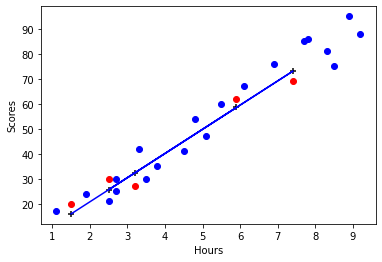

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, c ="blue")
plt.scatter(X_test, y_test, c ="red")
plt.scatter(X_test, y_predict, c ="black",marker='+')
plt.plot(X_test, y_predict, c ="blue")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()